<a href="https://colab.research.google.com/github/sugaya-findex/platform-ex/blob/main/R%E3%81%AB%E3%82%88%E3%82%8B%E7%B5%B1%E8%A8%88%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80_05_%E3%83%AA%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# １. リスト
リストは木構造をしたオブジェクトで、各枝には異なる構造のオブジェクトを配置することができます。


## １.１. リストの作成
リストを作成するには関数`list`を利用し、各枝にぶら下げるオブジェクトをコンマ区切りで記述します。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
l1 = 1:5
l2 = letters
l3 = NA
l4 = matrix(1:9,3)
list1 = list(l1=l1,l2=l2,l3=l3,l4=l4)
list1
```


リスト構造は、Rのいろいろな場面で利用されています。後で紹介するデータフレームも実はリストの一種ですし、線形モデルの当てはめ結果も実は、当てはめ時の様々な情報を保持したリストデータになっています。

In [ ]:
# 乱数のデータを作成
x = rnorm(100)
y = rnorm(100)
# 線形モデルを構築
# 線形モデルの当てはめ結果がリスト形式になっていることを確認してみます
str(lm(y~x))

List of 12
 $ coefficients : Named num [1:2] -0.0874 -0.0213
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "x"
 $ residuals    : Named num [1:100] 0.53 1.031 1.096 -1.08 -0.228 ...
  ..- attr(*, "names")= chr [1:100] "1" "2" "3" "4" ...
 $ effects      : Named num [1:100] 0.91 -0.235 0.955 -0.988 -0.3 ...
  ..- attr(*, "names")= chr [1:100] "(Intercept)" "x" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:100] -0.1401 -0.0708 -0.071 -0.1326 -0.0893 ...
  ..- attr(*, "names")= chr [1:100] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:100, 1:2] -10 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:100] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "x"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.1 1.11
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 98
 $ xlev

## １.２. リストの要素の取り出し
リストの各枝のデータを取り出すには、以下の３つの方法があります。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
list1$l1                 # リストオブジェクト$枝の名前
list1[["l1"]]            # リストオブジェクト[[枝の名前]]
list1[[1]]               # リストオブジェクト[[枝の番号]]
```


## １.３. リストに対する演算
リストの各枝に対してある同一の関数を適用することができ、このような処理を実行したい場合には関数`sapply`または`lapply`を利用します。
計算結果をベクトルとして受け取りたい場合には`sapply`を使用し、リストとして受け取りたい場合には`lapply`を使用します。ただし、`sapply`を利用しても各枝の計算結果が同じ長さのベクトルでない場合には、
計算結果が自動的にリスト形式に変換されてしまいますので注意してください。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
lapply(iris,summary)            # リストの各枝に関数summaryを適用する。計算結果をリストとして受け取る
sapply(iris,summary)            # 各枝の計算結果は同じ長さのベクトルではないので、lapplyと同じ結果になる
sapply(iris[,1:4],summary)      # 各枝の計算結果は同じ長さのベクトルなので、計算結果は行列になる
```


# ２. 行列とデータフレーム
データ分析の対象は複数の観測項目についての記録の集まりで、行列のかたちをしています。観測項目が列方向に並び、ひとつの記録が1行に対応する形式をとりますが、Rでは一般的にデータフレームと呼ばれるクラスのオブジェクトを分析対象にします。ここでは、行列とデータフレームの違いについて整理しておきたいと思います。

## ２.１. 行列
行列は、すべての要素が「同じ型」「同じクラス」になっているのが特徴です。以下のふたつの行列は、実数の行列と文字列の行列の例になっています。


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
matrix(1:12, 3, 4)
matrix(letters[1:6], 2, 3)
```


## ２.２. データフレーム
一方、実際の分析の場面で対象になるデータは、異なる型やクラスのデータが混在していることの方が多いでしょう。以下はFisherのアヤメのデータの一部ですが、個体ごとに、花弁`Petal`とがく片`Sepal`それぞれの長さ`Length`と幅`Width`、品種`Species`が記録されています。初めの4列は数値データですが、5列目の品種は類別を表す因子データになっていて、先ほどのデータ型、データクラスが揃った「行列」とは異なっています。

In [ ]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


データ型が揃っていなかった場合に、データ型の自動変換によってデータが自動変換されてしまうと、数値データを数値として扱えなくなってしまうなど大変不便です。そこで異なる型やクラスのデータを、その属性を保持したまま行列形式で組織化するための方法がデータフレームです。



データフレームの実体はリストです。ただし、リストの各枝のデータ長が揃っているために、あたかも行列のように扱うことができるようになっています。

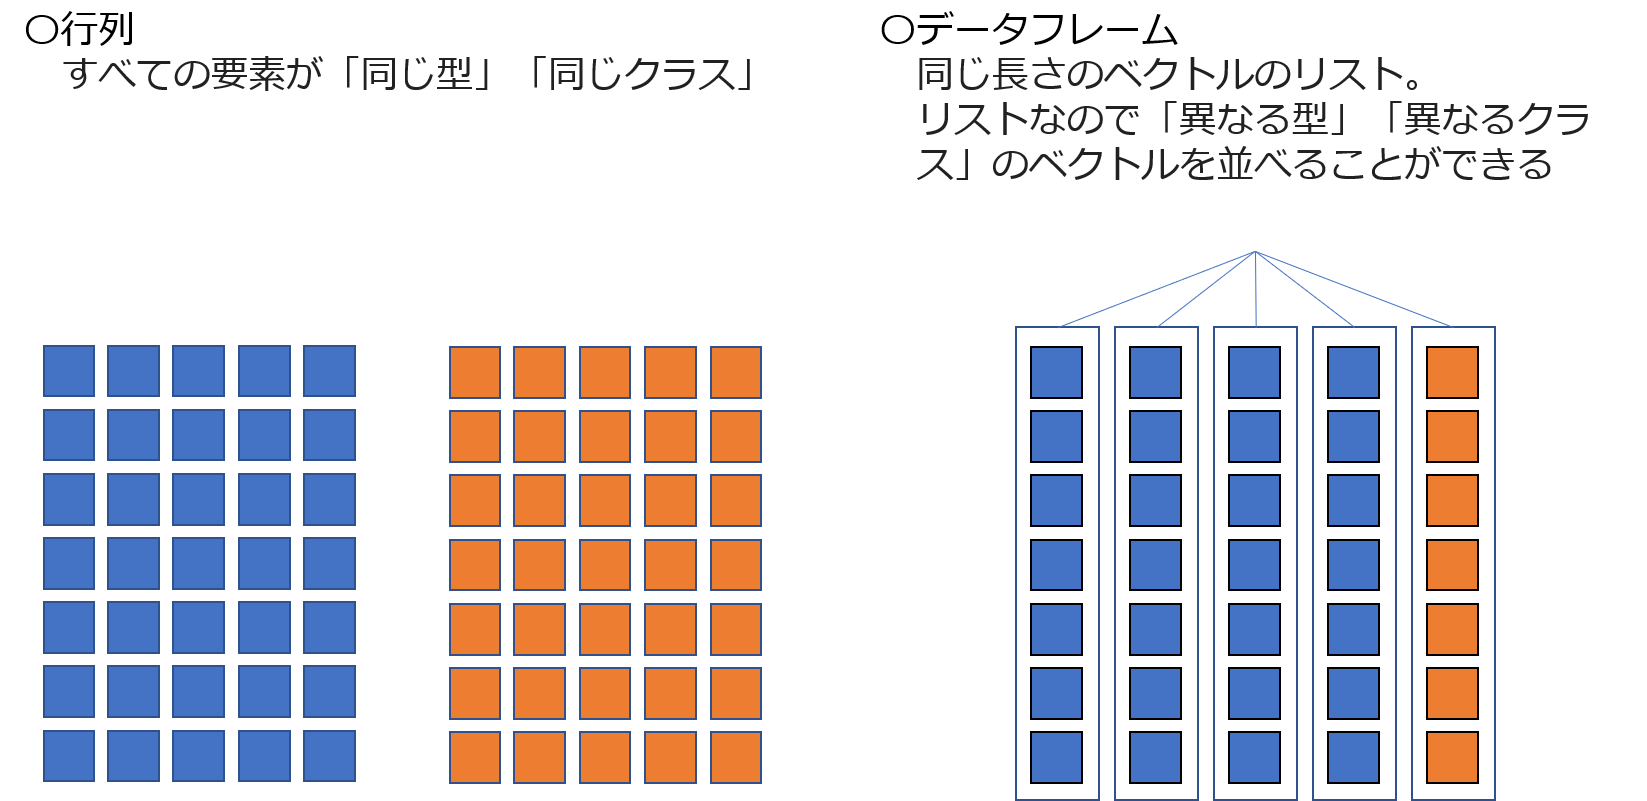


```R
############################################################
# 以下のコマンドをコードセルに入力し、実行してみてください #
############################################################
mode(iris)
class(iris)

# データフレームはリスト構造ですが、行列と同じように操作することができます
iris[2,]
iris[1:5,1]
iris[1:5,"Sepal.Length"]
```
